Shape: (20640, 9)
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedianHouseValue  
0    -122.23             4.526  
1    -122.22             3.585  
2    -122.24             3.521  
3    -122.25             3.413  
4    -122.25             3.422  
--- Linear Regression ---
MAE: 0.5332
RMSE: 0.7456
R²: 0.5758

--- Gradient Boosting ---
MAE: 0.3096
RMSE: 0.4642
R²: 0.8355



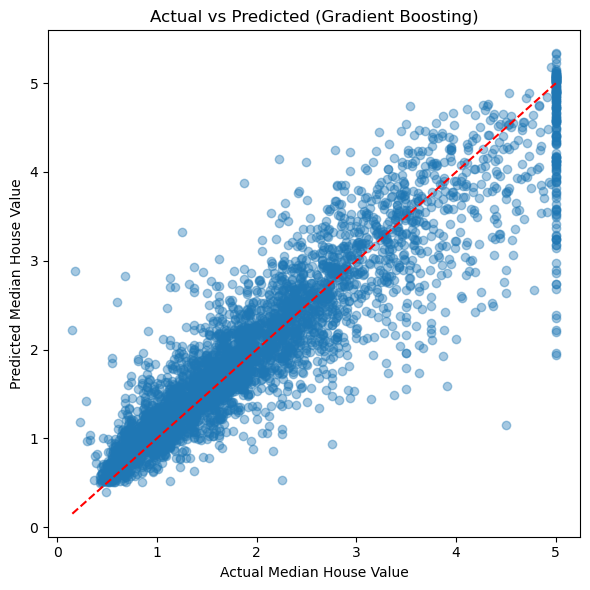

In [4]:
#  Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

#  Load dataset
data = fetch_california_housing(as_frame=True)
df = pd.DataFrame(data.data, columns=data.feature_names)
df['MedianHouseValue'] = data.target  # Add target column

#  Preview dataset
print("Shape:", df.shape)
print(df.head())

#  Define features and target
X = df.drop(columns=['MedianHouseValue'])
y = df['MedianHouseValue']

#  Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

#  Linear Regression model
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

#  Gradient Boosting model
gbr = HistGradientBoostingRegressor(random_state=42)
gbr.fit(X_train, y_train)
y_pred_gbr = gbr.predict(X_test)

#  Evaluation function (no version error)
def evaluate(name, y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = mean_squared_error(y_true, y_pred) ** 0.5  # manually calculate RMSE
    r2 = r2_score(y_true, y_pred)
    print(f"--- {name} ---")
    print(f"MAE: {mae:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"R²: {r2:.4f}\n")

#  Evaluate both models
evaluate("Linear Regression", y_test, y_pred_lr)
evaluate("Gradient Boosting", y_test, y_pred_gbr)

#  Plot: Actual vs Predicted (for Gradient Boosting)
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_gbr, alpha=0.4)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Median House Value")
plt.ylabel("Predicted Median House Value")
plt.title("Actual vs Predicted (Gradient Boosting)")
plt.tight_layout()
plt.show()


# Task 6: House Price Prediction

##  Objective
Predict median house values using housing and demographic features from the California Housing dataset.

##  Dataset
- Source: `scikit-learn` built-in California housing dataset
- Features: MedInc, HouseAge, AveRooms, AveBedrms, Population, etc.
- Target: MedianHouseValue

##  Tools Used
- Python
- Jupyter Notebook
- scikit-learn
- pandas, matplotlib

##  Models Applied
1. Linear Regression (Baseline)
2. Histogram-based Gradient Boosting Regressor (Advanced)

##  Evaluation Metrics
- Mean Absolute Error (MAE)
- Root Mean Squared Error (RMSE)
- R² Score

##  Results & Insights
- Gradient Boosting performed better than Linear Regression.
- Actual vs Predicted plot showed good correlation.
- Dataset is clean and ideal for modeling house prices.
